# Loan Prediction

In this Notebook, you can see the steps to solving the loan prediction problem referenced [here](https://github.com/ericdasse28/loan-prediction). Essentially, you will see the data exploration process

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

## Data Ingestion and Exploration

In [2]:
df = pd.read_csv("data/train.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# Summary of the numerical fields in the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The inferences we can already make are the following:
1. The LoanAmount field has 614 - 592 = 22 missing values
2. The Loan\_Amount\_Term field has 14 missing values
3. The Credit_History field has 614 - 564 = 50 missing values
4. The applicant incomes are very far from one another in the dataset (shown by the high standard deviation). This was actually to be expected. The same goes for the co-applicant incomes
6. Finally, we can notice 84% of applicants have credit history. This is determined thanks to the mean value of the field _Credit_History_ (whose values are only 1 for people who have credit history and 0 otherwise)

By comparing the median (50% figure) to the mean, we can also get an idea of the skewness of the dataset

Now, let's look at the non-numerical values (Property_Area, Credit_History, etc.), essentially, their frequency distribution to determine whether they make sense or not.

In [4]:
# Frequency table
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

What we notice is most of the loan applications come from the semi-urban area (233 instances) and the least comes from the rural area (179 instances). The urban area fits right in the middle with 202 instances.

One interesting thing to note is that in this dataset, despite the superior population density that is often attributed to urban areas, the semi-urban outnumbers the latter in terms of loan applications registered at Dream Housing Finance. This might be a fluke due to the limited size of the dataset so I won't make assumptions for the moment

## Distribution Analysis

Now that we are familiar with various data characteristics, let us study the distribution of various variables. Let us start with numeric variables - namely ApplicantIncome and LoanAmount.

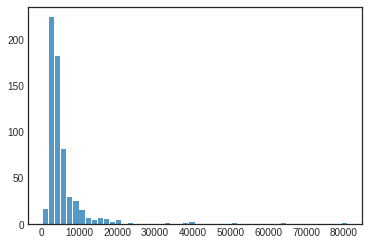

In [9]:
df["ApplicantIncome"].hist(bins=50, grid=False, alpha=0.75, rwidth=0.85)

Here, we observe that the distribution is skewed to the right, indicating that there are some exceptionally high applicant incomes. Those extreme values are relatively infrequent, which is why 50 bins are necessary to depict the distribution clearly

Next, we look at box plots to understand the distributions. Box plot for fare can be plotted by:

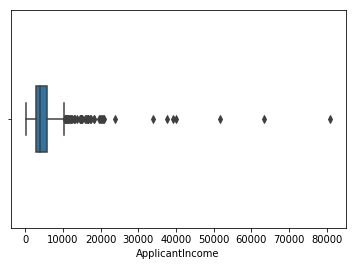

In [29]:
sns.boxplot(x=df["ApplicantIncome"], width=0.3)

This confirms the presence of a lot of outliers/extreme values. The reason might be the income disparity in the society. Part of this can be driven by the fact we are looking at people with different education levels.

Let's segregate them by Education:

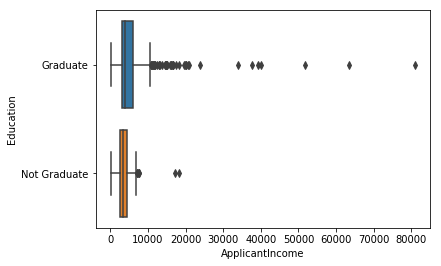

In [28]:
sns.boxplot(x=df["ApplicantIncome"], y=df["Education"])

The first thing we notice is there no substantial difference between the median income of graduate and non-graduate. However, there is a higher number of graduates with exceptional income.

Now, let's look at the histogram and boxplot of LoanAmount using the following command:

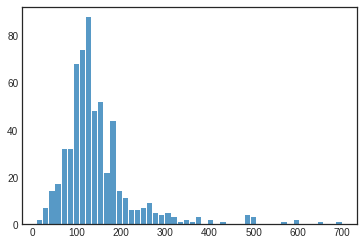

In [10]:
df["LoanAmount"].hist(bins=50, grid=False, alpha=0.75, rwidth=0.85)

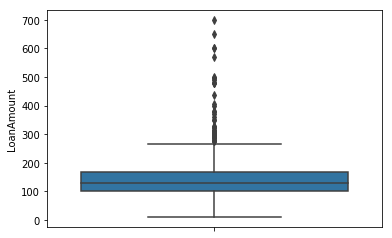

In [30]:
sns.boxplot(y=df["LoanAmount"])

Then again, we observe extreme values. Clearly, both ApplicantIncome and LoanAmount need further attention. LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values, which demands deeper understanding. We will take this up in coming sections.

## Categorical Variables Analysis

Now that we understand the distributions for ApplicantIncome and LoanAmount, let us understand categorical variables in more details. We will use Excel style pivot table and cross-tabulation. For instance, let us look at the chances of getting a loan based on credit history. This can actually be achieved in MS Excel using pivot tables.

Here, we will use Python to get the same results

In [29]:
temp1 = df["Credit_History"].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x:
                      x.map({'Y': 1, 'N': 0}).mean())
print('Frequency table for Credit History:')
print(temp1)

print('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


We now obtained results similar to MS Excel pivot tables. This can be plotted as a bar chart as follows

Credit history distribution and chances of getting a loan based on credit history


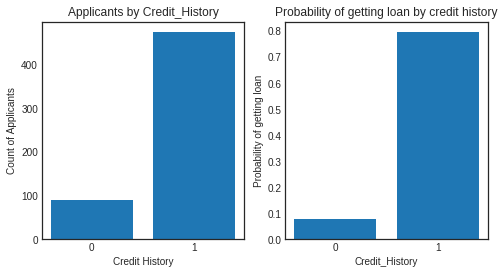

In [39]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlabel('Credit History')
ax1.set_xticks(np.arange(2))
ax1.set_xticklabels(["0", "1"])
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
ax1.bar(np.arange(2), temp1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(np.arange(2), temp2["Loan_Status"])
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_xticks(np.arange(2))
ax2.set_xticklabels(["0", "1"])
ax2.set_title("Probability of getting loan by credit history")
print("Credit history distribution and chances of getting a loan based on credit history")

What we see here is the chances of getting a loan are eight-fold if a person has a valid credit history. Similar graphs can be seen by Married, Self-Employed, Property_Area, etc. It all depends on the questions we want to answer. For example, we might ask ourselves: "Does being married gives one higher chances of getting a loan?"
I offer to answer that interesting question once we are done with Credit_History

Getting back to the main subject, we might alternatively want to combine the two previously shown graphs in a stacked chart:

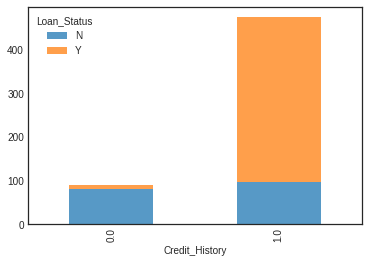

In [48]:
temp3 = pd.crosstab(df["Credit_History"], df["Loan_Status"])
temp3.plot(kind='bar', stacked=True, alpha=0.75)